In [2]:
import pandas as pd
import os

In [7]:
labels = {'pos':1, 'neg': 0}

df = pd.DataFrame()

for f in ('test', 'train'):
    for l in ('pos', 'neg'):
        path = os.path.join('data', f, l)
        for file in os.listdir(path):
            with open(os.path.join(path, file), 'r', encoding = 'utf-8') as infile:
                txt = infile.read()
            df = df.append([[txt, labels[l]]], ignore_index = True)

df.columns = ['review', 'sentiment']

In [8]:
df.head()

,review,sentiment
0,I went and saw this movie last night after bei...,1
1,Actor turned director Bill Paxton follows up h...,1
2,As a recreational golfer with some knowledge o...,1
3,"I saw this film in a sneak preview, and it is ...",1
4,Bill Paxton has taken the true story of the 19...,1


In [9]:
df.to_csv('movie_data.csv', index = False, encoding = "utf-8")

# Data Cleanup

In [59]:
import nltk
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')

In [60]:
# Uncomment this when you need them
# nltk.download('punkt')

In [61]:
# Uncomment this when you need them
# nltk.download('stopwords')

In [62]:
from nltk.corpus import stopwords
import string

In [77]:
reviews = df.review.str.cat(sep = ' ').lower()
# Function to split text into word
tokens = tokenizer.tokenize(reviews)

In [78]:
stop_words = set(stopwords.words('english') + list(string.punctuation) + ['br'])
tokens = [w for w in tokens if not w in stop_words]

vocabulary = set(tokens)
len(vocabulary)

101789

In [79]:
frequency_dist = nltk.FreqDist(tokens)
sorted(frequency_dist, key = frequency_dist.__getitem__, reverse = True)[0:50]

['movie',
 'film',
 'one',
 'like',
 'good',
 'time',
 'even',
 'would',
 'story',
 'really',
 'see',
 'well',
 'much',
 'bad',
 'get',
 'people',
 'great',
 'also',
 'first',
 'made',
 'make',
 'way',
 'could',
 'movies',
 'characters',
 'think',
 'watch',
 'character',
 'films',
 'two',
 'many',
 'seen',
 'love',
 'plot',
 'never',
 'life',
 'acting',
 'show',
 'best',
 'know',
 'little',
 'ever',
 'man',
 'better',
 'end',
 'scene',
 'still',
 'say',
 'scenes',
 'something']

In [80]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

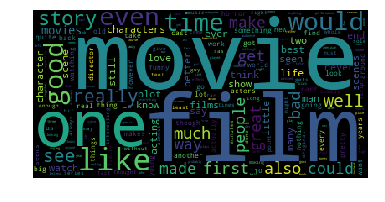

In [81]:
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequency_dist)

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# Building a Classifier